# Self-Driving Car Engineer Nanodegree

## Traffic Sign Classifier by Mark Moyou

 [Associated Report](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) 

<a id='Table_of_Contents'></a>

## Table of Contents

* [0) Data Loading](#Data_Loading)  
* [1) Data Summary](#Data_Summary)  
    * [1.1) Overall Data Summary](#overall_data_summary)
    * [1.1) Training Set Summary](#training_set_summary)
    * [1.1) Test Set Summary](#test_set_summary)
    * [1.1) Exploring Data Labels](#exploring_data_labels)
    * [1.1) Visualizing Training Data](#visualizing_training_data)
* [2) Model Architecture](#Model_Architecture)  
    * [2.1) Data Pre-processing](#data_pre-processing)
    * [2.2) Architecture Setup](#architecture_setup)
    * [2.3) Training the Deep NN](#training_the_deep_nn)
    * [2.4) Validation and Test Results](#validation_and_test_results)
* [3) Testing the Model on New Images](#testing_model_on_new_images) 
    * [3.1) Load and Display the New Images](#load_and_display_the_new_images)
    * [3.2) Preparing the Data for Classification](#preparing_the_data_for_classification)
    * [3.3) Analyzing the Performance on New Images](#analyzing_the_performance_on_new_images)
    * [3.4) Analyzing the Performance on the Testing Set](#analyzing_the_performance_on_the_testing_set)
    * [3.5) Softmax Output for New Images](#softmax_output_for_new_images)
* [4) Visualizing the Nueral Network State on New Images](#visualizing_the_nn_state) 
    
    
    
    
    
    

 

<a id='Data_Loading'></a>

---
## Step 0: Load The Data

In [8]:
# Imports
import tensorflow as tf
import tensorflow.contrib.slim as slim # TensorFlow-Slim 
from tensorflow.contrib.layers import flatten
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# from PIL import image
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import cv2
import math
import os
import time
import pickle
%matplotlib inline
print('Imports successful for the most part')
from scipy.misc import imresize

Imports successful for the most part


/home/mark/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [198]:
# Creates a session with log_device_placement set to True. 
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [4]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-sign-data/train.p'
validation_file= './traffic-sign-data/valid.p'
testing_file = 'traffic-sign-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
print('Data has been loaded successfully')

Data has been loaded successfully


<a id='Data_Summary'></a>

---
## Step 1: Dataset Summary & Exploration 
[Back to top](#Table_of_Contents)

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

<a id='overall_data_summary'></a>

### 1.1) Overall Data Summary
[Back to top](#Table_of_Contents)

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples, could also use the labels as well. 
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


<a id='training_set_summary'></a>

### 1.2) Training Set Summary
[Back to top](#Table_of_Contents)

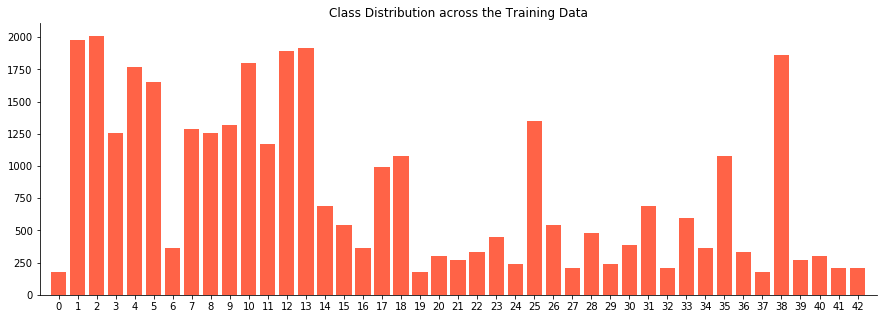

In [144]:
# Count the frequency of each label.
train_labels, labels_counts_train = np.unique(y_train, return_counts=True)

# Plot the histogram of the training labels.
plt.rcParams['figure.figsize'] = [15, 5]
labels_counts_axes_train = plt.gca()
labels_counts_axes_train.set_xlim([-1, n_classes])
labels_counts_plot__train_width = 0.8

# Remove the top and right axes.
labels_counts_axes_train.spines['right'].set_visible(False)
labels_counts_axes_train.spines['top'].set_visible(False)

plt.bar(train_labels, labels_counts_train, tick_label=train_labels, width=labels_counts_plot__train_width, \
            align='center', color='tomato')
plt.title('Class Distribution across the Training Data')
plt.show();

It is clear that the class label distribution for the training set is skewed. This will reflect in the overall accuracy, depending on what classes are being tested for. 

<a id='test_set_summary'></a>

### 1.3) Testing Set Summary
[Back to top](#Table_of_Contents)

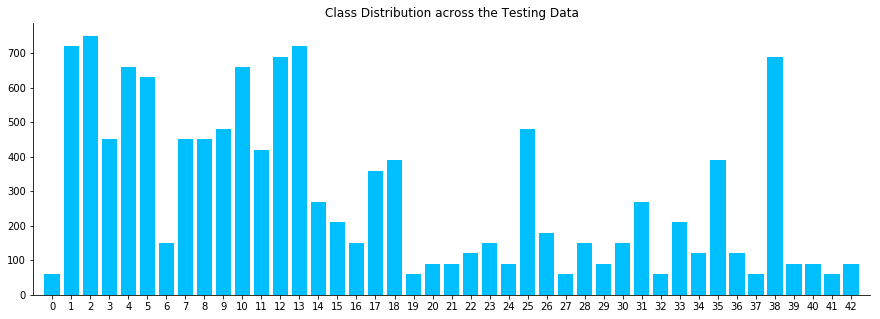

In [180]:
# Count the frequency of each label.
test_labels, labels_counts_test = np.unique(y_test, return_counts=True)

# Plot the histogram of the training labels.
plt.rcParams['figure.figsize'] = [15, 5]
labels_counts_axes_test = plt.gca()
labels_counts_axes_test.set_xlim([-1, n_classes])
labels_counts_plot_test_width = 0.8

# Remove the top and right axes.
labels_counts_axes_test.spines['right'].set_visible(False)
labels_counts_axes_test.spines['top'].set_visible(False)

plt.bar(test_labels, labels_counts_test, tick_label=train_labels, width=labels_counts_plot_test_width, align='center', \
        color='deepskyblue')
plt.title('Class Distribution across the Testing Data')
plt.show();

We can see that the test data is also skewed, but in the same way as the training data. The only difference is the counts of the labels, which is expected because we have less testing shapes. 

For instance, if we are trying to maxmize the efficiency on the test set, then it does not make sense to balance the class distributions on the training set, because of the shared skewness in both distributions. 

The only case where balancing the training set label distribution would be if we were trying to maximize a particular metric such as the F1 score. However, one needs to consider that in the real world application, the distribution of road signs may not be equal, due to the types of roads present. So determining, which metric is the best is a matter of how tied to the dataset you want to be. 

<a id='exploring_data_labels'></a>

### 1.4) Exploring Data Labels
[Back to top](#Table_of_Contents)

In [149]:
# Create a dataframe to store the data in the csv file. 
sign_labels_df = pd.read_csv('signnames.csv', index_col='ClassId')
sign_labels_df.head()
sign_labels_orig = list(sign_labels_df['SignName'])

,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)


In [9]:
# Calculate the occurences of the labels. 
sign_labels_df['Occurrence'] = [labels_counts_train[label_index] for label_index in range(0, n_classes)]
sign_labels_df.sort_values('Occurrence', ascending=False)

,SignName,Occurrence
ClassId,,
2,Speed limit (50km/h),2010
1,Speed limit (30km/h),1980
13,Yield,1920
12,Priority road,1890
38,Keep right,1860
10,No passing for vehicles over 3.5 metric tons,1800
4,Speed limit (70km/h),1770
5,Speed limit (80km/h),1650
25,Road work,1350


<a id='visualizing_training_data'></a>

### 1.5) Visualizing Training Data
[Back to top](#Table_of_Contents)

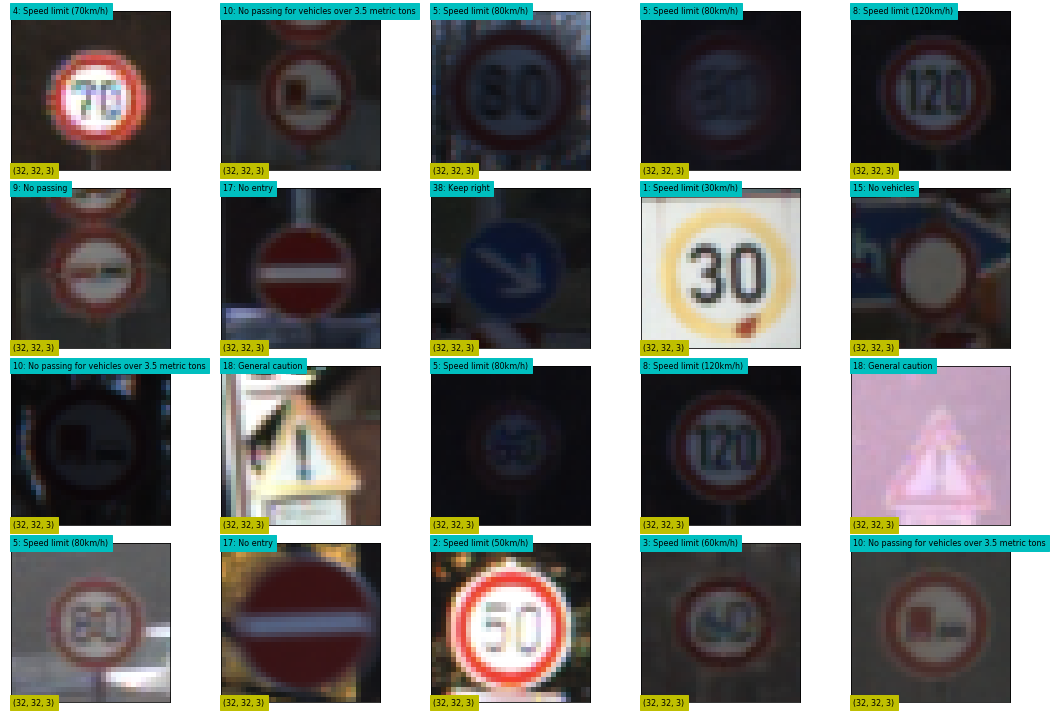

In [10]:
num_images_to_show = 20 # Number of random images to show. 

# Indices of the images to show. 
indices = np.random.choice(list(range(n_train)), size=num_images_to_show, replace=False)
indices_labels_index = y_train[indices] 
labels_for_show = [sign_labels_df.loc[class_id, 'SignName'] for class_id in indices_labels_index]

# Gather image data.
subset_train_images = X_train[indices]

# Set up the plot. 
num_cols_subset_train = 5
num_rows_subset_train = num_images_to_show//num_cols_subset_train

# subset_train_plt = plt.figure(figsize=(num_cols_subset_train*3, num_rows_subset_train*2.5));
plt.rcParams['figure.figsize'] = [num_cols_subset_train*3, num_rows_subset_train*2.5]

# Loop through the training images and plot them. 
for i, curr_train_image in enumerate(subset_train_images):
    plt.subplot(num_rows_subset_train, num_cols_subset_train, i+1)
    plt.imshow(curr_train_image)
    plt.text(0, 0, '{}: {}'.format(indices_labels_index[i], labels_for_show[i]), \
                          color='k', backgroundcolor='c', fontsize=8)
    plt.text(0, curr_train_image.shape[0], '{}'.format(curr_train_image.shape), color='k', \
                          backgroundcolor='y', fontsize=8)
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()    
plt.show();

<a id='Model_Architecture'></a>

----

## Step 2: Model Architecture
[Back to top](#Table_of_Contents)

<a id='data_pre-processing'></a>

### 2.1) Data Pre-processing
[Back to top](#Table_of_Contents)

In [11]:
# Parameters for training. 
save_transf_imgs = 0 # 1 - on, 0 - off. 
augmented_data_filename = 'augmented_images.pckl'
import pickle

In [13]:
# Setup a pickle file to store the transformed images. 

if save_transf_imgs == 1: 
    
    # Add translation to images. 
    x_translated = []
    y_translated = np.copy(y_train)

    for ind_trans in range(n_train):
        ind = (np.random.rand(2)*20)-10
        M_translate = np.float32([[1,0,ind[0]],[0,1,ind[1]]])
        x_translated.append(cv2.warpAffine(X_train[ind_trans], M_translate, image_shape))
    print('Image translation complete')
        
    # Add rotation to images. 
    x_rotated = []
    y_rotated = np.copy(y_train)

    for ind_rot in range(n_train):
        ind = (np.random.rand(1)*90)-45
        M = cv2.getRotationMatrix2D((32/2,32/2),ind[0],1)
        x_rotated.append(cv2.warpAffine(X_train[ind_rot],M,(32,32)))
    print('Image rotation complete.')
        
    # Flip the pictures
    x_flipped = []
    y_flipped = np.copy(y_train)

    for ind_flipped in range(n_train):
        x_flipped.append(np.fliplr(X_train[ind_flipped]))
    print('Image flipping complete.')
        
    # Rotate the Translated pictures
    x_rotated_translated = []
    y_rotated_translated = np.copy(y_train)

    for ind_rot_trans in range(n_train):
        ind = (np.random.rand(1)*90)-45
        M = cv2.getRotationMatrix2D((32/2,32/2),ind[0],1)
        x_rotated_translated.append(cv2.warpAffine(x_translated[ind_rot_trans],M,(32,32)))
    print('Image rotation and translation complete')
        
    # Color shifted images. 
    x_colored = []
    y_colored = np.copy(y_train)

    scale_val = 1

    for im_num in range(n_train):
        R = np.ndarray.flatten(X_train[im_num,:,:,0])
        G = np.ndarray.flatten(X_train[im_num,:,:,1])
        B = np.ndarray.flatten(X_train[im_num,:,:,2])
        vector_img = np.array((R,G,B))
        corr_mat = np.corrcoef(vector_img)
        w, v = np.linalg.eig(corr_mat)

        new_img = np.copy(X_train[0])*0

        for ind_row in range(image_shape[0]):
            for ind_col in range(image_shape[1]):
                rand = np.array((np.random.normal(loc=0,scale=scale_val), \
                                 np.random.normal(loc=0,scale=scale_val), \
                                 np.random.normal(loc=0,scale=scale_val)))
                temp = np.dot(v, w*rand)
                new_img[ind_row, ind_col,:] = temp + X_train[im_num, ind_row, ind_col,:]
        x_colored.append(new_img)   
    print('Image coloring complete')
        
    # Create a pickle file. 
    with open(augmented_data_filename, 'wb') as pick_aug_file:
        pickle.dump(x_translated, pick_aug_file)
        pickle.dump(y_translated, pick_aug_file)
        pickle.dump(x_rotated, pick_aug_file)
        pickle.dump(y_rotated, pick_aug_file)
        pickle.dump(x_flipped, pick_aug_file)
        pickle.dump(y_flipped, pick_aug_file)
        pickle.dump(x_rotated_translated, pick_aug_file)
        pickle.dump(y_rotated_translated, pick_aug_file)
        pickle.dump(x_colored, pick_aug_file)
        pickle.dump(y_colored, pick_aug_file)
    print('Pickle file complete')
        

In [14]:
# Load the augmented data. 
if save_transf_imgs != 1:
    # Create a pickle file. 
    with open(augmented_data_filename, 'rb') as pick_aug_file:
        x_translated = pickle.load(pick_aug_file)
        y_translated = pickle.load(pick_aug_file)
        x_rotated = pickle.load(pick_aug_file)
        y_rotated= pickle.load(pick_aug_file)
        x_flipped = pickle.load(pick_aug_file)
        y_flipped = pickle.load(pick_aug_file)
        x_rotated_translated = pickle.load(pick_aug_file)
        y_rotated_translated = pickle.load(pick_aug_file)
        x_colored = pickle.load(pick_aug_file)
        y_colored = pickle.load(pick_aug_file)
    print('Augmented data loaded successfully')

Augmented data loaded successfully


In [15]:
# Checking the sizes of each of the augmented data sections. 

print('Number of translated images: ' + str(len(x_translated)))
print('Number of translated labels: ' + str(len(x_translated)))
print('Number of rotated images: ' + str(len(x_rotated)))
print('Number of rotated labels: ' + str(len(y_rotated)))
print('Number of flipped images: ' + str(len(x_flipped)))
print('Number of flipped labels: ' + str(len(y_flipped)))
print('Number of rotated_translated images: ' + str(len(x_rotated_translated)))
print('Number of rotated_translated labels: ' + str(len(y_rotated_translated)))
print('Number of colored images: ' + str(len(x_colored)))
print('Number of colored labels: ' + str(len(y_colored)))
print('Total augmented images = ', str(len(x_translated) + len(x_rotated) + len(x_flipped)\
                                      + len(x_rotated_translated) + len(x_colored)))

Number of translated images: 34799
Number of translated labels: 34799
Number of rotated images: 34799
Number of rotated labels: 34799
Number of flipped images: 34799
Number of flipped labels: 34799
Number of rotated_translated images: 34799
Number of rotated_translated labels: 34799
Number of colored images: 34799
Number of colored labels: 34799
Total augmented images =  173995


In [199]:
# Add augmented images to the training array
X_augmented_train = np.concatenate((X_train,x_translated,x_rotated,x_rotated_translated,x_colored))
y_augmented_train = np.concatenate((y_train,y_translated,y_rotated,y_rotated_translated,y_colored))

n_augmented_train = len(X_augmented_train)
print('Number of total augmented images: ' + str(n_augmented_train))

Number of total augmented images: 173995


<a id='architecture_setup'></a>

### 2.2) Architecture setup
[Back to top](#Table_of_Contents)

In [17]:
EPOCHS = 150
BATCH_SIZE = 300

from tensorflow.contrib.layers import flatten
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID') + b
    return x

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='VALID')

def activation(x):
    return tf.nn.relu(x)

mu = 0
sigma = 0.1

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
# Define weight and bias terms for every layer
weights = {
    # Convolutional Layer 1, Input: 32x32x3    Output: 28x28x6
    'wc1': tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma)),
    # Convolutional Layer 2, Input: 14x14x6     Output: 10x10x16
    'wc2': tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma)),
    # Pooling Layer 1, Input: 400     Output: 120
    'wd1': tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma)),
    # Pooling Layer 2, Input: 120     Output: 84
    'wd2': tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma)),
    # Pooling Layer 3, Input: 84     Output: 10
    'wd3': tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))}

biases = {
    # Convolutional Layer 1, Input: 32x32x3    Output: 28x28x6
    'bc1': tf.Variable(tf.zeros(6)),
    # Convolutional Layer 2, Input: 14x14x6     Output: 10x10x16
    'bc2': tf.Variable(tf.zeros(16)),
    # Pooling Layer 1, Input: 400     Output: 120
    'bd1': tf.Variable(tf.zeros(120)),
    # Pooling Layer 2, Input: 120     Output: 84
    'bd2': tf.Variable(tf.zeros(84)),
    # Pooling Layer 3, Input: 84     Output: 10
    'bd3': tf.Variable(tf.zeros(43))}

def LeNet(x):    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1 = conv2d(x, weights['wc1'],biases['bc1'])
    
    # Local Response Normalization
    conv1 = tf.nn.local_response_normalization(conv1,5,2.0,0.001,0.75)

    # Activation.
    conv1 = activation(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1)

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2 = conv2d(conv1, weights['wc2'],biases['bc2'])
    
    # Local Response Normalization
    conv2 = tf.nn.local_response_normalization(conv2,5,2.0,0.001,0.75)
    
    # Activation.
    conv2 = activation(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = maxpool2d(conv2)
    
    # Flatten. Input = 5x5x16. Output = 400.
    flat = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    pool1 = tf.matmul(flat,weights['wd1']) + biases['bd1']
    
    # Activation.
    pool1 = activation(pool1)
    
    # Dropout
    pool1 = tf.nn.dropout(pool1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    pool2 = tf.matmul(pool1,weights['wd2']) + biases['bd2']
    
    # Activation.
    pool2 = activation(pool2)
    
    # Dropout
    pool2 = tf.nn.dropout(pool2, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = tf.matmul(pool2,weights['wd3']) + biases['bd3']
    
    return logits

print('Weights, biases and layers all initialized')

Weights, biases and layers all initialized


In [18]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32) # probability to keep units
print('Input initialization complete')

Input initialization complete


In [19]:
rate = 0.0001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
print('Cost functions initialized')

Cost functions initialized


In [20]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

print('Evaluate function defined correctly')

Evaluate function defined correctly


<a id='training_the_deep_nn'></a>

### 2.3) Training the Deep NN
[Back to top](#Table_of_Contents)


In [21]:
import tensorflow as tf
validation = []
training = []
t = []
basename = 'lenet_traffic'
model_folder = './model_data/'
keep_prob_val = 0.5
train_network = 0

# Save name for each epoch. 
save_name_epoch = model_folder + basename

if train_network == 1:

    with tf.Session() as sess:
        # Initialize variables.
        sess.run(tf.global_variables_initializer())

        print("Training...")
        print()

        # Loop through the epochs.
        for i in range(EPOCHS):
            # Seperate the data in batches. 
            for offset in range(0, n_augmented_train, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_augmented_train[offset:end], y_augmented_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: keep_prob_val})

            # Evaluate the network
            validation_accuracy = evaluate(X_valid, y_valid)
            training_accuracy = evaluate(X_augmented_train, y_augmented_train)

            # Append values to graph later
            validation.append(validation_accuracy)
            training.append(training_accuracy)
            t.append(i)

            # Print training status
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print("Training Accuracy = {:.3f}".format(training_accuracy))
            print()

        saver.save(sess, save_name_epoch)
        print('Model ' + save_name_epoch + ' saved')
    print('Training complete')
else:
    print('Network not trained, previous session loaded.')

Training...

EPOCH 1 ...
Validation Accuracy = 0.054
Training Accuracy = 0.053

EPOCH 2 ...
Validation Accuracy = 0.050
Training Accuracy = 0.060

EPOCH 3 ...
Validation Accuracy = 0.076
Training Accuracy = 0.077

EPOCH 4 ...
Validation Accuracy = 0.144
Training Accuracy = 0.131

EPOCH 5 ...
Validation Accuracy = 0.195
Training Accuracy = 0.157

EPOCH 6 ...
Validation Accuracy = 0.250
Training Accuracy = 0.190

EPOCH 7 ...
Validation Accuracy = 0.292
Training Accuracy = 0.220

EPOCH 8 ...
Validation Accuracy = 0.315
Training Accuracy = 0.234

EPOCH 9 ...
Validation Accuracy = 0.334
Training Accuracy = 0.243

EPOCH 10 ...
Validation Accuracy = 0.346
Training Accuracy = 0.252

EPOCH 11 ...
Validation Accuracy = 0.358
Training Accuracy = 0.261

EPOCH 12 ...
Validation Accuracy = 0.374
Training Accuracy = 0.272

EPOCH 13 ...
Validation Accuracy = 0.391
Training Accuracy = 0.285

EPOCH 14 ...
Validation Accuracy = 0.409
Training Accuracy = 0.296

EPOCH 15 ...
Validation Accuracy = 0.423
Tra

'./model_data/lenet_traffic'

Model ./model_data/lenet_traffic saved
Training complete


<a id='validation_and_test_results'></a>

### 2.4) Validation and Test Results
[Back to top](#Table_of_Contents)

In [10]:
# Save the t, validation and training accuracies for plotting. 
save_acc = 0
val_acc_pickle = './gen_data/validation_accuracy.pckl'
if save_acc == 1: 
    with open(val_acc_pickle, 'wb') as pick_val_acc_save:
        pickle.dump(t, pick_val_acc_save)
        pickle.dump(validation, pick_val_acc_save)
        pickle.dump(training, pick_val_acc_save)
else:
    with open(val_acc_pickle, 'rb') as pick_val_acc_load:
        t = pickle.load(pick_val_acc_load)
        validation = pickle.load(pick_val_acc_load)
        training = pickle.load(pick_val_acc_load)

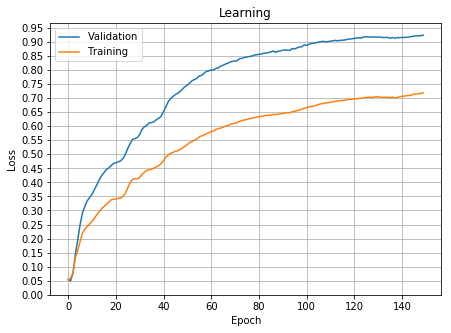

In [15]:
# Visualize the learning
plt.rcParams['figure.figsize'] = [7, 5]
plt.plot(t, validation,t,training)
plt.legend(('Validation','Training'))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.yticks(np.arange(0, 1, 0.05))
plt.title('Learning');

In [24]:
# Validate the model

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./model_data/'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))    

Test Accuracy = 0.917


<a id='testing_model_on_new_images'></a>

---

## Step 3: Testing the Model on New Images
[Back to top](#Table_of_Contents)

<a id='load_and_display_the_new_images'></a>

### 3.1) Load and Display the New Images
[Back to top](#Table_of_Contents)

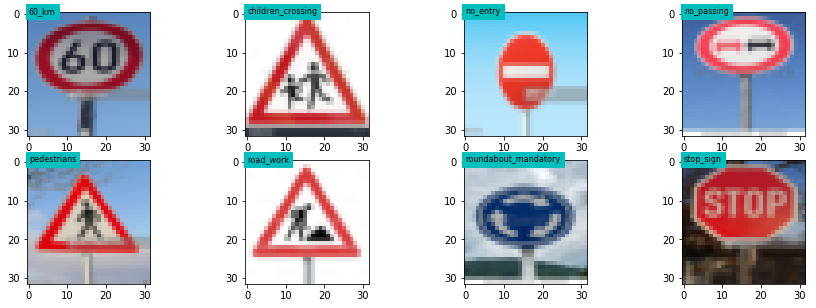

In [140]:
# Load all the images. 

new_traffic_img_names = ['60_km.jpg', 'children_crossing.jpg', 'no_entry.jpg',\
                         'no_passing.jpg', 'pedestrians.jpg', 'road_work.jpg',\
                         'roundabout_mandatory.jpg', 'stop_sign.jpg']

img_folder = './new_traffic_sign_imgs/'
unsized_60_km = mpimg.imread(img_folder + new_traffic_img_names[0])
unsized_children_crossing = mpimg.imread(img_folder + new_traffic_img_names[1])
unsized_no_entry = mpimg.imread(img_folder + new_traffic_img_names[2])
unsized_no_passing = mpimg.imread(img_folder + new_traffic_img_names[3])
unsized_pedestrians = mpimg.imread(img_folder + new_traffic_img_names[4])
unsized_road_work = mpimg.imread(img_folder + new_traffic_img_names[5])
unsized_roundabout_mandatory = mpimg.imread(img_folder + new_traffic_img_names[6])
unsized_stop_sign = mpimg.imread(img_folder + new_traffic_img_names[7])

im_w = 32
im_h = 32
im_d = 3

# Resize every image to be passed through the net
resized_60_km = imresize(unsized_60_km, (im_w,im_h,im_d))
resized_children_crossing = imresize(unsized_children_crossing, (im_w,im_h,im_d))
resized_no_entry = imresize(unsized_no_entry, (im_w,im_h,im_d))
resized_no_passing = imresize(unsized_no_passing, (im_w,im_h,im_d))
resized_pedestrians = imresize(unsized_pedestrians, (im_w,im_h,im_d))
resized_road_work = imresize(unsized_road_work, (im_w,im_h,im_d))
resized_roundabout_mandatory = imresize(unsized_roundabout_mandatory, (im_w,im_h,im_d))
resized_stop_sign = imresize(unsized_stop_sign, (im_w,im_h,im_d))

n_row_traffImgs = 2 # Number of rows for subplotting.
n_col_traffImgs = 4

# Visualize the new images
plt.figure()
plt.subplot(n_row_traffImgs,n_col_traffImgs,1); plt.imshow(resized_60_km);
plt.text(0, 0, '{}'.format(new_traffic_img_names[0][:-4]),\
         color='k', backgroundcolor='c', fontsize=8)
plt.subplot(n_row_traffImgs,n_col_traffImgs,2); plt.imshow(resized_children_crossing);
plt.text(0, 0, '{}'.format(new_traffic_img_names[1][:-4]), \
         color='k', backgroundcolor='c', fontsize=8)
plt.subplot(n_row_traffImgs,n_col_traffImgs,3); plt.imshow(resized_no_entry);
plt.text(0, 0, '{}'.format(new_traffic_img_names[2][:-4]), \
         color='k', backgroundcolor='c', fontsize=8)
plt.subplot(n_row_traffImgs,n_col_traffImgs,4); plt.imshow(resized_no_passing);
plt.text(0, 0, '{}'.format(new_traffic_img_names[3][:-4]), \
         color='k', backgroundcolor='c', fontsize=8)
plt.subplot(n_row_traffImgs,n_col_traffImgs,5); plt.imshow(resized_pedestrians);
plt.text(0, 0, '{}'.format(new_traffic_img_names[4][:-4]), \
         color='k', backgroundcolor='c', fontsize=8)
plt.subplot(n_row_traffImgs,n_col_traffImgs,6); plt.imshow(resized_road_work);
plt.text(0, 0, '{}'.format(new_traffic_img_names[5][:-4]), \
         color='k', backgroundcolor='c', fontsize=8)
plt.subplot(n_row_traffImgs,n_col_traffImgs,7); plt.imshow(resized_roundabout_mandatory);
plt.text(0, 0, '{}'.format(new_traffic_img_names[6][:-4]), \
         color='k', backgroundcolor='c', fontsize=8)
plt.subplot(n_row_traffImgs,n_col_traffImgs,8); plt.imshow(resized_stop_sign);
plt.text(0, 0, '{}'.format(new_traffic_img_names[7][:-4]), \
         color='k', backgroundcolor='c', fontsize=8);


<a id='preparing_the_data_for_classification'></a>

### 3.2) Preparing the Data for Classification
[Back to top](#Table_of_Contents)

In [54]:
# Make a list of all the test images
x_internet = []
x_internet.append(resized_60_km)
x_internet.append(resized_children_crossing)
x_internet.append(resized_no_entry)
x_internet.append(resized_no_passing)
x_internet.append(resized_pedestrians)
x_internet.append(resized_road_work)
x_internet.append(resized_roundabout_mandatory)
x_internet.append(resized_stop_sign)

# Make a list of their labels
y_internet = []
y_internet.append([3])
y_internet.append([28])
y_internet.append([17])
y_internet.append([9])
y_internet.append([27])
y_internet.append([25])
y_internet.append([40])
y_internet.append([14])

print('New data ready for classification.')

New data ready for classification.


In [56]:
# Collect the predictions of the set collected from the internet
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./model_data/'))
    softmax = tf.nn.softmax(logits)
    result = sess.run(softmax, feed_dict={x: x_internet, keep_prob:1})
    values, indices = tf.nn.top_k(result, 1)
    probs = sess.run(values)
    predictions = sess.run(indices)
print('Predictions collected')

Predictions collected


In [57]:
# Collect the predictions of the test set
start_time = time.time()
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./model_data/'))
    test_softmax = tf.nn.softmax(logits)
    test_result = sess.run(test_softmax, feed_dict={x: X_test, keep_prob:1})
    test_values, test_indices = tf.nn.top_k(test_result, 1)
    test_probs = sess.run(test_values)
    test_predictions = sess.run(test_indices)
    
stop_time = time.time()

elapse_time = stop_time - start_time
average_inference = elapse_time / n_test

print("--- %s seconds ---" % (average_inference))
print("--- %s seconds ---" % (elapse_time))

--- 0.0001770515811886942 seconds ---
--- 2.236161470413208 seconds ---


<a id='analyzing_the_performance_on_new_images'></a>

### 3.3) Analyzing the Performance on New Images
[Back to top](#Table_of_Contents)

Performance on new test images is: 50.00%


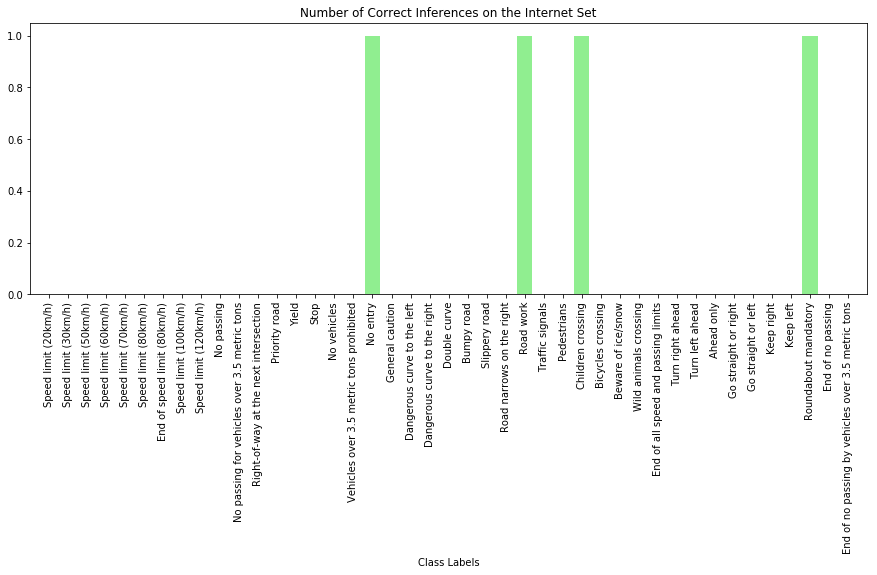

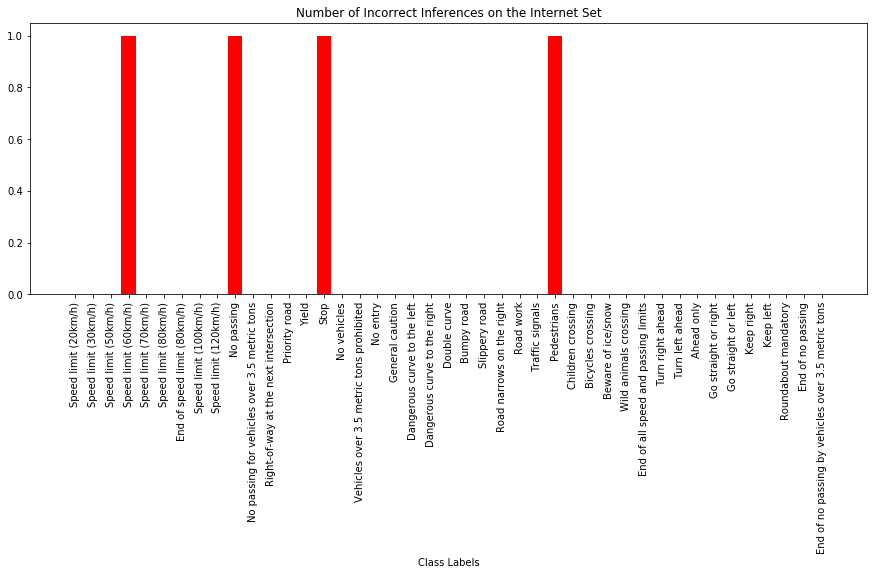

In [158]:
n_internet = len(x_internet)
bins = range(n_classes)
perf = 0
internet_correct = np.zeros((n_classes,1))
internet_wrong = np.zeros((n_classes,1))

for i in range(n_internet):
    int_ind = y_internet[i]
    if predictions[i,0] == int_ind:
        perf += 1
        internet_correct[int_ind] += 1
    else:
        internet_wrong[int_ind] += 1
perf = perf * (100/n_internet)

print('Performance on new test images is: ' + '%.2f' % perf + '%')

# Correct Plots. 
plt.figure()

# Plot the histogram of the training labels.
plt.rcParams['figure.figsize'] = [15, 5]
labels_counts_axes_train = plt.gca()
_ = labels_counts_axes_train.set_xlim([-1, n_classes])
plt.bar(bins, internet_correct, tick_label=train_labels, color='lightgreen')
plt.xticks(bins, sign_labels_orig, rotation='vertical')
plt.title('Number of Correct Inferences on the Internet Set')
plt.xlabel('Class Labels')

# Incorrect Plots.
plt.figure()
plt.bar(bins, internet_wrong, tick_label=train_labels, color='red')
plt.title('Number of Incorrect Inferences on the Internet Set')
plt.xticks(bins, sign_labels_orig, rotation='vertical')
plt.xlabel('Class Labels');

<a id='analyzing_the_performance_on_the_testing_set'></a>

### 3.4) Analyze Performance on the Testing Set
[Back to top](#Table_of_Contents)

Performance on the testing set is: 91.69%


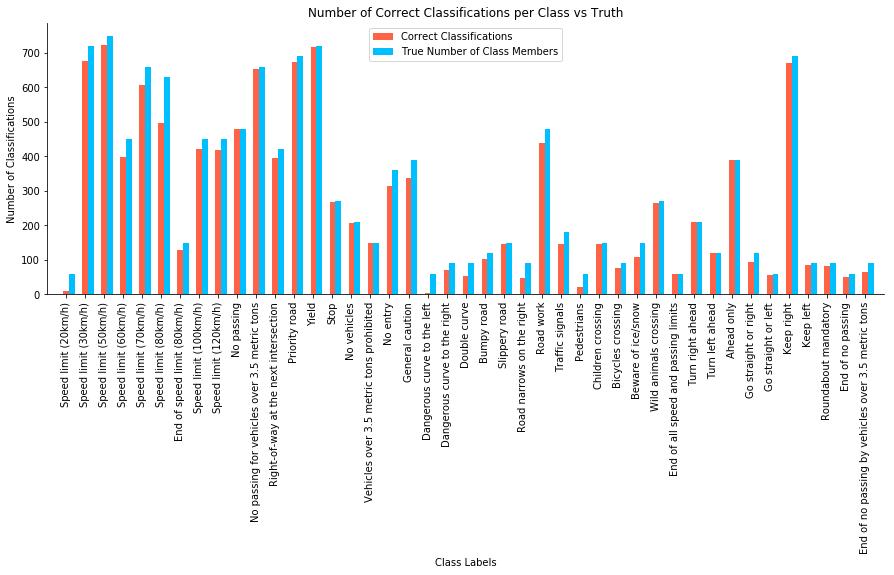

In [179]:
test_perf = 0
test_correct = np.zeros((n_classes,1))
test_wrong = np.zeros((n_classes,1))

for i in range(n_test):
    test_ind = y_test[i]
    if test_predictions[i,0] == test_ind:
        test_perf += 1
        test_correct[test_ind] += 1
    else:
        test_wrong[test_ind] += 1
test_perf = test_perf * (100/n_test)

print('Performance on the testing set is: ' + '%.2f' % test_perf + '%')

width_sep = 0.3
bins_shifted_true = [xx + width_sep for xx in list(bins)]
bins_shifted_incorrect = [xx - width_sep for xx in list(bins)]

# Plot the histogram of the training labels.
plt.rcParams['figure.figsize'] = [15, 5]
labels_counts_axes_train = plt.gca()
_ = labels_counts_axes_train.set_xlim([-1, n_classes])
labels_counts_plot_train_width = 0.3
labels_counts_plot_train_width_shifted = 0.3

# Remove the top and right axes.
labels_counts_axes_train.spines['right'].set_visible(False)
labels_counts_axes_train.spines['top'].set_visible(False)

# Plot the correctly classified vs the truth per class. 
plt.bar(bins, test_correct, tick_label=train_labels, width=labels_counts_plot_train_width, \
            align='center', color='tomato', label = 'Correct Classifications')
plt.bar(bins_shifted, labels_counts_test, tick_label=train_labels, \
        width=labels_counts_plot_train_width_shifted, \
            align='center', color='deepskyblue', label = 'True Number of Class Members')
plt.title('Number of Correct Classifications per Class vs Truth')
plt.xlabel('Class Labels')
plt.xticks(bins, sign_labels_orig, rotation='vertical')
plt.ylabel('Number of Classifications')
plt.legend(loc='best')
plt.show();

<a id='softmax_output_for_new_images'></a>

### 3.5) Softmax Output for New Images
[Back to top](#Table_of_Contents)

In [185]:
num_prob_to_show = 5
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./model_data/'))
    softmax = tf.nn.softmax(logits)
    result = sess.run(softmax, feed_dict={x: x_internet, keep_prob:1})
    values, indices = tf.nn.top_k(result, num_prob_to_show)
    probs = sess.run(values)
    predictions = sess.run(indices)
np.set_printoptions(precision=4)
print('Top ' + str(num_prob_to_show) +  ' probabilities: \n')
print(probs)
print('\nPredicted Labels for the top ' + str(num_prob_to_show) + ' probabilities:\n')
print(predictions)

Top 5 probabilities: 

[[  9.8295e-01   1.3009e-02   1.9746e-03   6.9297e-04   2.1666e-04]
 [  7.4330e-01   1.8154e-01   3.0581e-02   1.2811e-02   1.2770e-02]
 [  9.6981e-01   2.9168e-02   9.4272e-04   6.3180e-05   8.3965e-06]
 [  7.4007e-01   1.1677e-01   6.2768e-02   5.1361e-02   2.5318e-02]
 [  5.9597e-01   3.1732e-01   2.5971e-02   2.2374e-02   1.1600e-02]
 [  8.6320e-01   6.9584e-02   2.2188e-02   1.1211e-02   7.5695e-03]
 [  5.2529e-01   1.3382e-01   1.1224e-01   7.1432e-02   6.7637e-02]
 [  5.7424e-01   3.2358e-01   8.0964e-02   1.8135e-02   1.7388e-03]]

Predicted Labels for the top 5 probabilities:

[[12 13 17 26 22]
 [28 24 27 18 20]
 [17 14 12 10 13]
 [13 36 35 38 12]
 [26 18 25 27 22]
 [25 11 31 18 30]
 [40 39 38 37 33]
 [17 14 12 26 22]]


<a id='visualizing_the_nn_state'></a>

## Step 4: Visualize the Neural Network's State on New Images
[Back to top](#Table_of_Contents)

In [193]:
def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('./model_data/'))
        activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
        featuremaps = activation.shape[3]
        plt.figure(plt_num, figsize=(15,15))
        for featuremap in range(featuremaps):
            plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
            plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
            if activation_min != -1 & activation_max != -1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max)
            elif activation_max != -1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max)
            elif activation_min !=-1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min)
            else:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest")

In [194]:
# Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
conv1_c = conv2d(x, weights['wc1'],biases['bc1'])
# Local Response Normalization
conv1_n = tf.nn.local_response_normalization(conv1_c,5,2.0,0.001,0.75)
# Activation.
conv1_a = activation(conv1_n)
# Pooling. Input = 28x28x6. Output = 14x14x6.
conv1 = maxpool2d(conv1_a)

# Layer 2: Convolutional. Output = 10x10x16.
conv2_c = conv2d(conv1, weights['wc2'],biases['bc2'])    
# Local Response Normalization
conv2_n = tf.nn.local_response_normalization(conv2_c,5,2.0,0.001,0.75)
# Activation.
conv2_a = activation(conv2_n)
# Pooling. Input = 10x10x16. Output = 5x5x16.
conv2 = maxpool2d(conv2_a)

vis_data = []
vis_data.append(X_augmented_train[0])

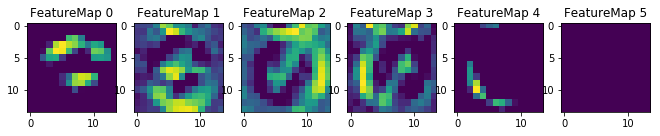

In [195]:
outputFeatureMap(vis_data,conv1)

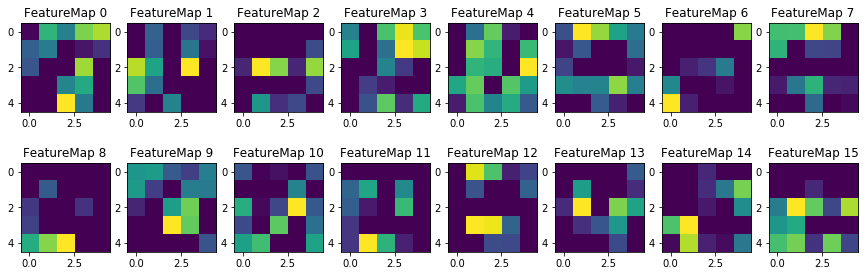

In [196]:
outputFeatureMap(vis_data,conv2)